First, we import the libraries and read the dataset. We also print some basic characteristics of the dataset

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

path = "documents/data/GroupAssignment-Data.csv"
df = pd.read_csv(path, header=None)

n = len(df)
n_cols = len(df.columns) - 2 #two response variables
new_col_names = ["y1", "y2"]
for i in range(n_cols):
    new_col_names.append(f"x{i+1}") #rename the columns for readibility
df.columns = new_col_names

print(f"number of observations: {n}\nnumber of columns: {n_cols} (plus the response variables)")
df.describe()

number of observations: 1000
number of columns: 55 (plus the response variables)


,y1,y2,x1,x2,x3,x4,x5,x6,x7,x8,...,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.670000,38.496000,193966.802000,10.121000,1371.337000,94.82800,40.467000,0.067000,0.743000,0.036000,...,0.255000,0.044000,0.142000,0.120000,0.053000,0.044000,0.095000,0.016000,0.839000,0.246000
std,0.470448,13.187186,111900.741812,2.636534,9265.777009,436.96023,11.257248,0.250147,0.437198,0.186383,...,0.436079,0.205198,0.349225,0.325124,0.224146,0.205198,0.293362,0.125538,0.367715,0.430894
min,0.000000,17.000000,19303.000000,1.000000,0.000000,0.00000,4.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28.000000,120275.500000,9.000000,0.000000,0.00000,40.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,37.000000,182114.000000,10.000000,0.000000,0.00000,40.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,48.000000,242664.250000,13.000000,0.000000,0.00000,45.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,90.000000,953589.000000,16.000000,99999.000000,4356.00000,99.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


It is given that the first response variable y1 is a binary variable. The corresponding column has a of mean of 0.67, which means the data is somewhat unbalanced, but not to the extent that special outlier detection methods are needed for the classification. We plot the histogram of the values of y2, the second outcome variable

Notice that that there are a lot of columns with a minimum of 0 and a maximum of 1. Their medians and are also 1 or 0, which suggests that they might be binary variables.

In [ ]:
pd.options.plotting.backend = "plotly"
print(pd.unique(df["y2"]))
fig = df["y2"].hist()
fig.show(renderer="browser")

[44 48 67 26 21 45 69 39 18 23 50 52 47 66 53 56 27 24 28 55 37 30 33 25
 31 43 42 41 19 35 32 22 36 38 49 54 34 65 20 60 46 57 17 58 59 63 61 40
 51 64 90 71 62 29 76 72 73 84 82 78 74]


In [60]:
import plotly
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
fig = make_subplots(rows=2, cols=3)
fig.add_trace(
    go.Histogram(x=df["y2"], name="y2"),
    row=1, col=1
)
fig.add_trace(
    go.Histogram(x=df["x1"], name="x1"),
    row=1, col=2
)
fig.add_trace(
    go.Histogram(x=df["x2"], name="x2"),
    row=1, col=3
)
fig.add_trace(
    go.Histogram(x=df["x3"], name="x3"),
    row=2, col=1
)
fig.add_trace(
    go.Histogram(x=df["x4"], name="x4"),
    row=2, col=2
)
fig.add_trace(
    go.Histogram(x=df["x5"]),
    row=2, col=3
)
fig.update_xaxes(title_text="Value")
fig.update_yaxes(title_text="Frequency")

fig.show(renderer="browser")

In [85]:
fig = make_subplots(rows=2, cols=3)
fig.add_trace(
    go.Histogram(x=df[df["x3"]>0]["x3"], name="x3 without 0s", marker_color='#AB63FA'),
    row=1, col=2
)
fig.add_trace(
    go.Histogram(x=df[df["x4"]>0]["x4"], name="x4 without 0s", marker_color='#FFA15A'),
    row=1, col=3
)

fig.update_xaxes(title_text="Value")
fig.update_yaxes(title_text="Frequency")

fig.show(renderer="browser")

We see that all values are integers and the distribution is skewed to the left. This suggest a count distribution. This is important to know for model selection as Poisson regression will be more suitable than linear.

Next we investagite the predictors in our dataset.

In [29]:
binary_cols = []
numeric_cols = []

for column in df.columns:
    if column == "y1" or column == "y2":
        pass
    elif len(pd.unique(df[column])) == 2 and df[column].min() == 0 and df[column].max() == 1:
        binary_cols.append(column)
    else:
        numeric_cols.append(column)


print(f"the number of binary columns: {len(binary_cols)}\nthe number of numeric columns: {len(numeric_cols)}")
print(df[numeric_cols].describe())
print(df[binary_cols].describe())

the number of binary columns: 48
the number of numeric columns: 7
                  x1           x2            x3          x4           x5  \
count    1000.000000  1000.000000   1000.000000  1000.00000  1000.000000   
mean   193966.802000    10.121000   1371.337000    94.82800    40.467000   
std    111900.741812     2.636534   9265.777009   436.96023    11.257248   
min     19303.000000     1.000000      0.000000     0.00000     4.000000   
25%    120275.500000     9.000000      0.000000     0.00000    40.000000   
50%    182114.000000    10.000000      0.000000     0.00000    40.000000   
75%    242664.250000    13.000000      0.000000     0.00000    45.000000   
max    953589.000000    16.000000  99999.000000  4356.00000    99.000000   

          x27     x33  
count  1000.0  1000.0  
mean      0.0     0.0  
std       0.0     0.0  
min       0.0     0.0  
25%       0.0     0.0  
50%       0.0     0.0  
75%       0.0     0.0  
max       0.0     0.0  
                x6           x7  

Notice that columns x27 and x33 are filled with zeros. We can drop these columns as they don't carry extra information.

In [30]:
df.drop(columns=["x27", "x33"], axis=1, inplace=True)
numeric_cols.remove("x27")
numeric_cols.remove("x33")

Now we plot the correlation heatmaps

In [7]:
def plot_corr_heatmap(data: pd.DataFrame) -> None:
    corr = data.corr()
    fig, ax = plt.subplots(figsize=(12,10))
    sns.heatmap(corr, cmap="YlGnBu", ax=ax)

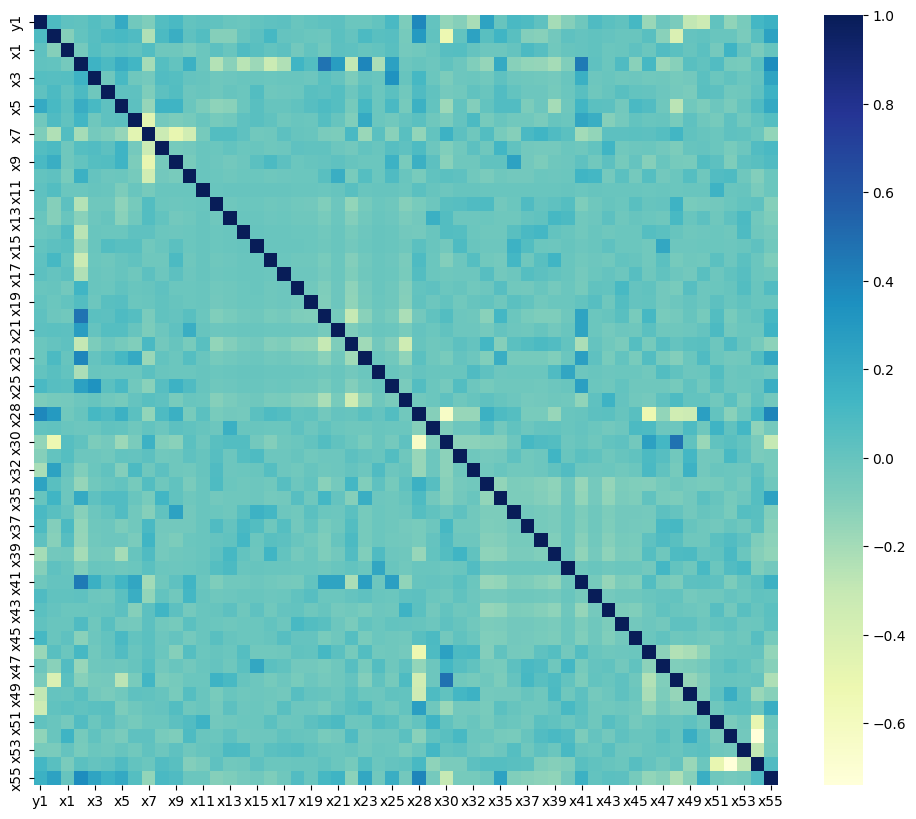

In [8]:
plot_corr_heatmap(df)

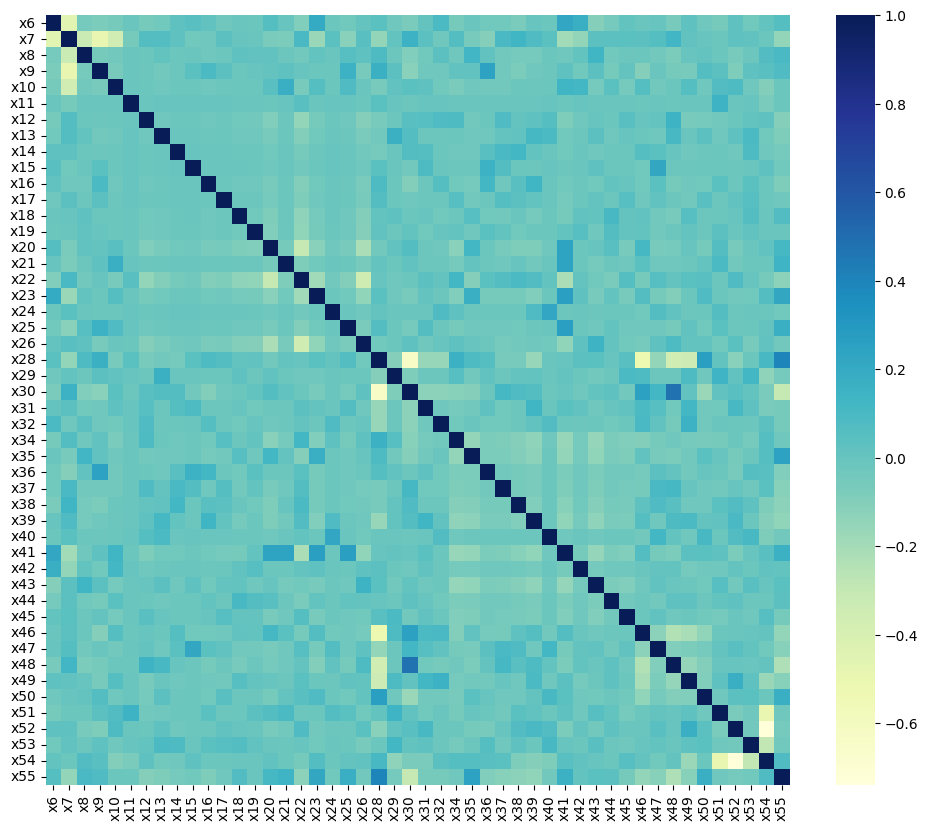

In [9]:
plot_corr_heatmap(df[binary_cols])

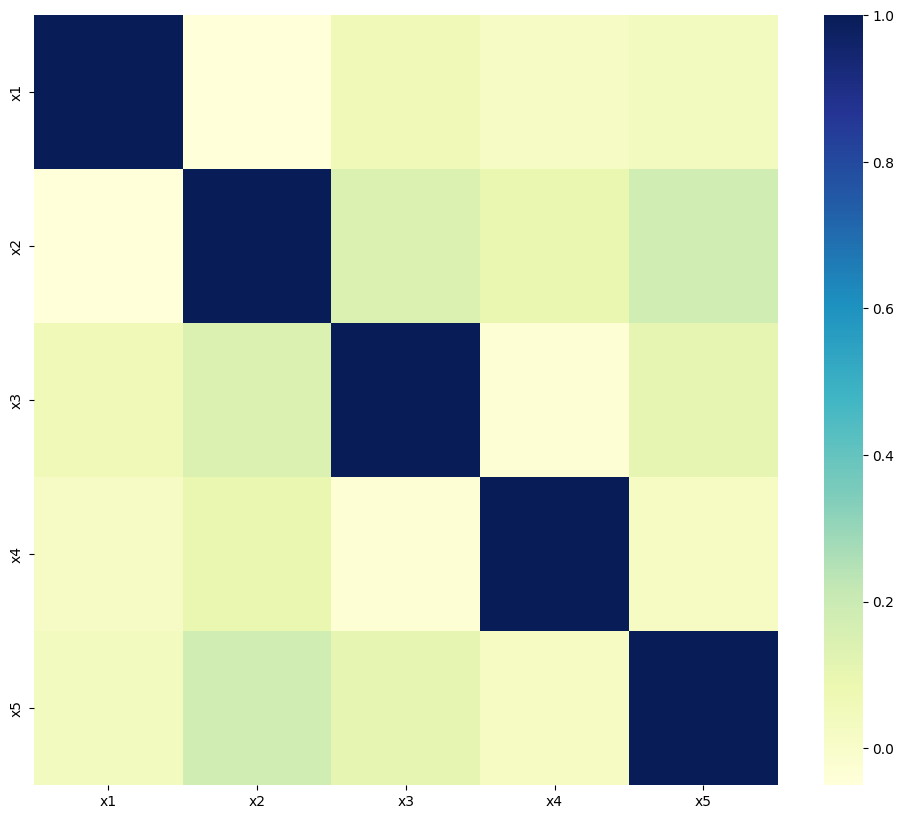

In [10]:
plot_corr_heatmap(df[numeric_cols])

Now we investigate the distribution of the numeric predictor variables

In [39]:
def plot_col_info(data: pd.DataFrame, col_number: int) -> None:
    col = numeric_cols[col_number]
    print(data[col].describe())
    frac = False
    for val in sorted(pd.unique(data[col])):
        if val - round(val) == 0:
            pass
        else:
            frac = True
            break
    print(f"number of unique values: {len(pd.unique(data[col]))}, containts fractional: {frac}")
    data[col].hist()

count      1000.000000
mean     193966.802000
std      111900.741812
min       19303.000000
25%      120275.500000
50%      182114.000000
75%      242664.250000
max      953589.000000
Name: x1, dtype: float64
number of unique values: 996, containts fractional: False


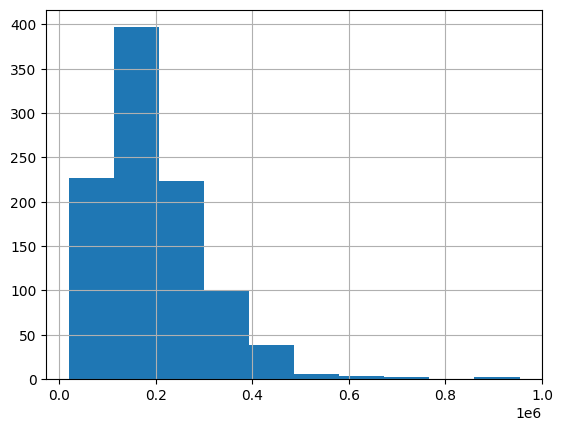

In [40]:
plot_col_info(df, 0)

We see no fractional values and a left skewed distribution suggesting a count variable

count    1000.000000
mean       10.121000
std         2.636534
min         1.000000
25%         9.000000
50%        10.000000
75%        13.000000
max        16.000000
Name: x2, dtype: float64
number of unique values: 16, containts fractional: False


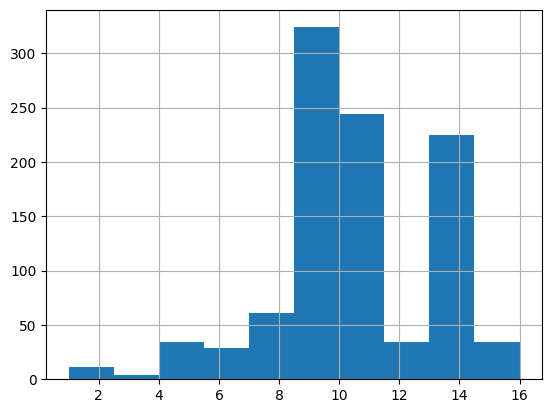

In [41]:
plot_col_info(df, 1)

count     1000.000000
mean      1371.337000
std       9265.777009
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: x3, dtype: float64
number of unique values: 45, containts fractional: False


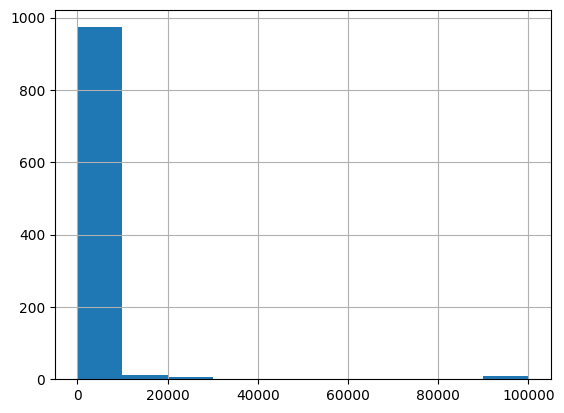

In [42]:
plot_col_info(df, 2)

This column also only contains integers, but it has a large number of zeros. So we plot the non zero values separately

count       83.00000
mean     16522.13253
std      28152.87588
min        594.00000
25%       3120.00000
50%       7298.00000
75%      14684.00000
max      99999.00000
Name: x3, dtype: float64
number of unique values: 44, containts fractional: False


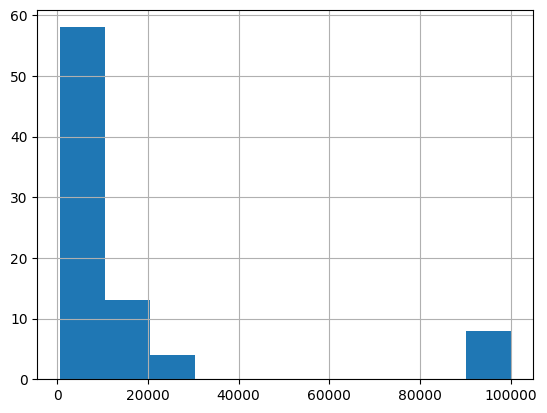

In [44]:
plot_col_info(df[df["x3"] > 0], 2)

count    1000.00000
mean       94.82800
std       436.96023
min         0.00000
25%         0.00000
50%         0.00000
75%         0.00000
max      4356.00000
Name: x4, dtype: float64
number of unique values: 25, containts fractional: False


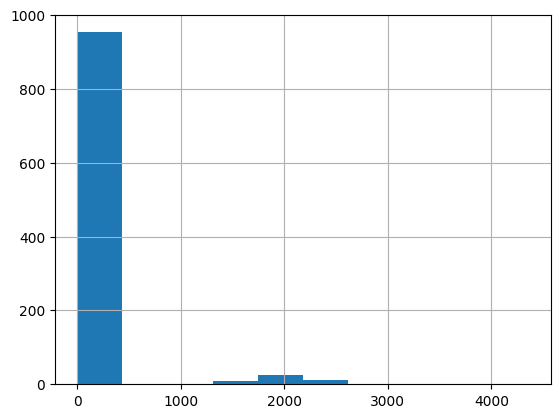

In [46]:
plot_col_info(df, 3)

count      47.000000
mean     2017.617021
std       427.558059
min      1485.000000
25%      1881.500000
50%      1977.000000
75%      2179.000000
max      4356.000000
Name: x4, dtype: float64
number of unique values: 24, containts fractional: False


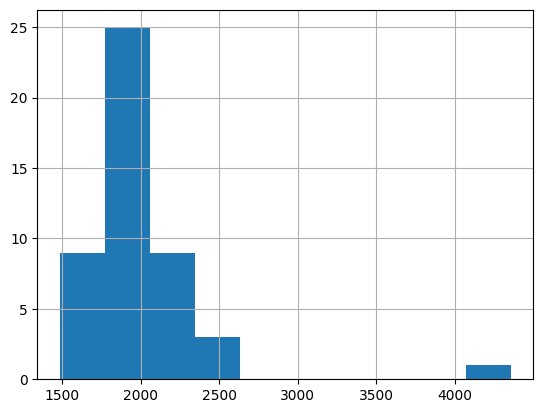

In [47]:
plot_col_info(df[df["x4"] > 0], 3)

count    1000.000000
mean       40.467000
std        11.257248
min         4.000000
25%        40.000000
50%        40.000000
75%        45.000000
max        99.000000
Name: x5, dtype: float64
number of unique values: 52, containts fractional: False


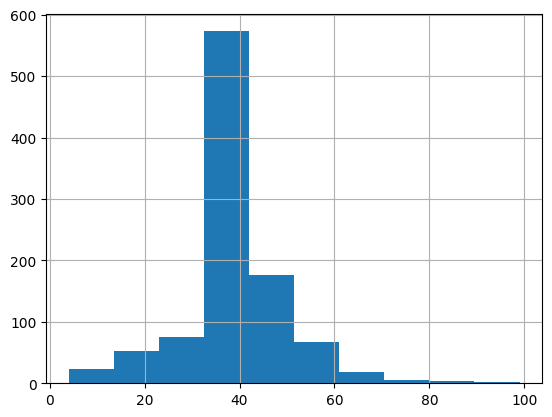

In [48]:
plot_col_info(df, 4)

For the zero inflated variables we can introduce a binary column that takes on value 1 of the the original column has value 0. This will help regression models deal with the data. 

Next we check the unbalancedness of the binary predictor variables

In [91]:
share_of_ones = {"columns": ["y1"], "values": [df["y1"].mean()]}
for col in binary_cols:
    print(f"column: {col}, share of ones: {df[col].mean()}")
    share_of_ones["columns"].append(col)
    share_of_ones["values"].append(df[col].mean())
plot_df = pd.DataFrame.from_dict(share_of_ones)
colors = ["crimson" if c == "y1" else "steelblue" for c in plot_df["columns"]]

fig = plotly.express.bar(
    plot_df,
    x="columns",
    y="values",
    color=plot_df["columns"],  # optional to keep legend
    color_discrete_sequence=colors,
)

fig.update_layout(
    title="Share of Ones per Column",
    xaxis_title="Variable",
    yaxis_title="Share of Ones",
    showlegend=False,
    template="plotly_white",
)
fig.show(renderer="browser")
fig.show(renderer="browser")

column: x6, share of ones: 0.067
column: x7, share of ones: 0.743
column: x8, share of ones: 0.036
column: x9, share of ones: 0.078
column: x10, share of ones: 0.043
column: x11, share of ones: 0.001
column: x12, share of ones: 0.041
column: x13, share of ones: 0.02
column: x14, share of ones: 0.007
column: x15, share of ones: 0.004
column: x16, share of ones: 0.02
column: x17, share of ones: 0.014
column: x18, share of ones: 0.034
column: x19, share of ones: 0.039
column: x20, share of ones: 0.158
column: x21, share of ones: 0.015
column: x22, share of ones: 0.324
column: x23, share of ones: 0.067
column: x24, share of ones: 0.004
column: x25, share of ones: 0.019
column: x26, share of ones: 0.205
column: x28, share of ones: 0.447
column: x29, share of ones: 0.014
column: x30, share of ones: 0.331
column: x31, share of ones: 0.029
column: x32, share of ones: 0.03
column: x34, share of ones: 0.132
column: x35, share of ones: 0.119
column: x36, share of ones: 0.039
column: x37, share of

In [53]:
vals = []
for i in range(n):
    val = 0
    for col in binary_cols:
        val += df.iloc[i][col]
    vals.append(val)
vals_series = pd.Series(vals)
print(vals_series.describe())
print(vals_series.value_counts())

count    1000.000000
mean        5.528000
std         0.695485
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         7.000000
dtype: float64
6    501
5    394
4     53
7     46
3      6
Name: count, dtype: int64


In [54]:
df["x3_0"] = np.where(df["x3"] == 0, 1, 0)
df["x4_0"] = np.where(df["x4"] == 0, 1, 0)


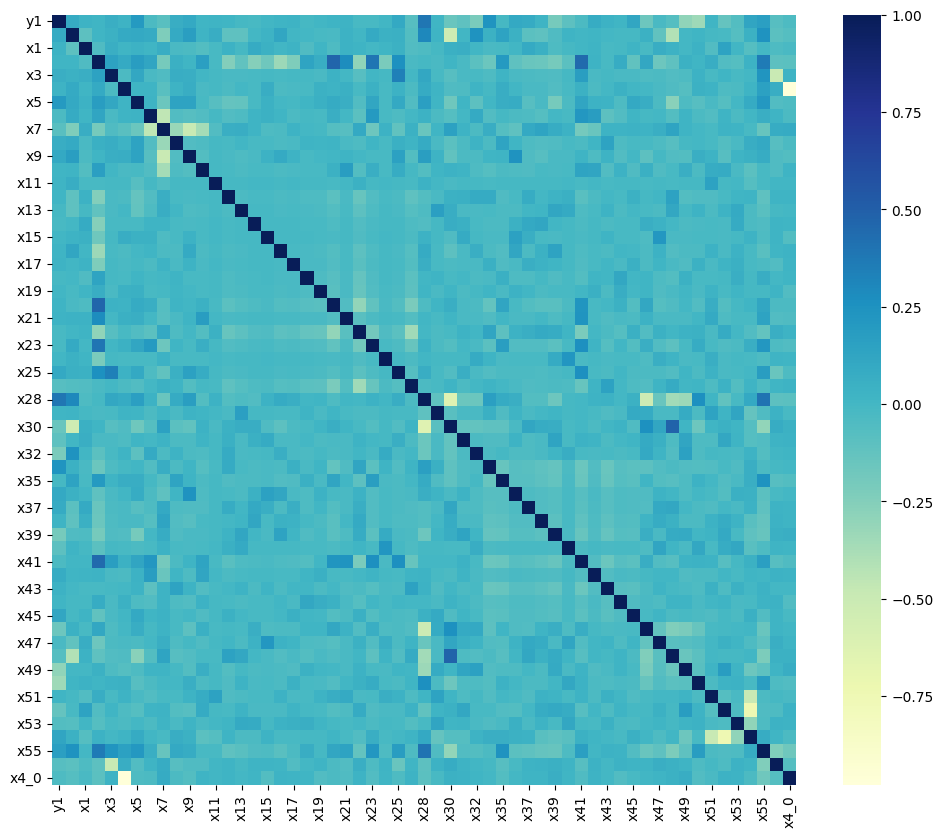

In [55]:
plot_corr_heatmap(df)